In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [84]:
data = pd.read_csv("house_prices_subset_IrinaCruceru.csv")

In [85]:
data.shape

(1168, 19)

In [86]:
data.isna().sum()

,0
Foundation,0
BsmtQual,28
BsmtCond,28
BsmtExposure,28
BsmtFinType1,28
BsmtFinSF1,0
BsmtFinType2,28
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0


In [87]:
data.dtypes

,0
Foundation,object
BsmtQual,object
BsmtCond,object
BsmtExposure,object
BsmtFinType1,object
BsmtFinSF1,int64
BsmtFinType2,object
BsmtFinSF2,int64
BsmtUnfSF,int64
TotalBsmtSF,int64


In [88]:
X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

categorical_columns = X.select_dtypes(include=["object"]).columns
numeric_columns = X.select_dtypes(exclude=["object"]).columns

In [89]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_columns),
    ("cat", categorical_transformer, categorical_columns)
])

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [92]:
y_pred = pipe.predict(X_test)


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

In [94]:
print(r2)
print(MSE)
print(MAE)

0.7917462132264856
1346112953.7668352
25018.67981738317


task 4 nov

In [95]:
data['SalePrice'].describe()

,SalePrice
count,1168.000000
mean,181441.541952
std,77263.583862
min,34900.000000
25%,130000.000000
50%,165000.000000
75%,214925.000000
max,745000.000000


In [96]:
bins = [0, 180000, 300000, float('inf')]
labels = ['cheap', 'medium', 'expensive']

data['SalePriceCat_3'] = pd.cut(data['SalePrice'], bins=bins, labels=labels)
data = data.drop(columns=['SalePrice'])

In [97]:
data['SalePriceCat_3'].value_counts()

,count
SalePriceCat_3,
cheap,711
medium,366
expensive,91


In [98]:
from sklearn.linear_model import LogisticRegression
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_columns),
    ("cat", categorical_transformer, categorical_columns)
])

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

In [99]:
X = data.drop(columns=["SalePriceCat_3"])
y = data["SalePriceCat_3"]

categorical_columns = X.select_dtypes(include=["object"]).columns
numeric_columns = X.select_dtypes(exclude=["object"]).columns

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8632478632478633
              precision    recall  f1-score   support

       cheap       0.93      0.94      0.93       140
   expensive       0.73      0.52      0.61        21
      medium       0.77      0.82      0.79        73

    accuracy                           0.86       234
   macro avg       0.81      0.76      0.78       234
weighted avg       0.86      0.86      0.86       234



In [102]:
#k=6
data = pd.read_csv("house_prices_subset_IrinaCruceru.csv")
df_clf_k6 = data.copy()

df_clf_k6['SalePrice_cat_6'] = pd.qcut(
    df_clf_k6['SalePrice'],
    q=6,
    labels=[f'cat_{i}' for i in range(1, 7)]
)
df_clf_k6 = df_clf_k6.drop(columns=['SalePrice'])

# Check distribution of categories
print(df_clf_k6['SalePrice_cat_6'].value_counts())

SalePrice_cat_6
cat_2    199
cat_1    195
cat_6    195
cat_3    194
cat_5    194
cat_4    191
Name: count, dtype: int64


In [103]:
X_k6 = df_clf_k6.drop(columns=['SalePrice_cat_6'])
y_k6 = df_clf_k6['SalePrice_cat_6']

In [104]:
X_train_k6, X_test_k6, y_train_k6, y_test_k6 = train_test_split(X_k6, y_k6, test_size=0.2, random_state=42, stratify=y_k6)

In [105]:
pipe.fit(X_train_k6, y_train_k6)
y_pred_k6 = pipe.predict(X_test_k6)

In [106]:
print("Accuracy:", accuracy_score(y_test_k6, y_pred_k6))
print(classification_report(y_test_k6, y_pred_k6))

Accuracy: 0.6153846153846154
              precision    recall  f1-score   support

       cat_1       0.83      0.74      0.78        39
       cat_2       0.52      0.55      0.54        40
       cat_3       0.38      0.44      0.40        39
       cat_4       0.50      0.53      0.51        38
       cat_5       0.71      0.56      0.63        39
       cat_6       0.83      0.87      0.85        39

    accuracy                           0.62       234
   macro avg       0.63      0.62      0.62       234
weighted avg       0.63      0.62      0.62       234



When classifying house prices into 3 categories, the model achieved high accuracy (86%). This is because the price groups are broader and easier for the model to distinguish in feature space.

However, when splitting prices into 6 equal-frequency bins, performance dropped to 62%, with middle-price bins being the hardest to classify. This reflects the fact that greater granularity makes the classification task harder.

Overall, fewer, well-separated categories lead to better classification performance in this dataset.

SHAP integration

In [107]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_columns),
    ("cat", categorical_transformer, categorical_columns)
])

pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", LinearRegression())
])

In [108]:
X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

categorical_columns = X.select_dtypes(include=["object"]).columns
numeric_columns = X.select_dtypes(exclude=["object"]).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'],
      dtype='object'))])),
                ('model', LinearRegression())])

/tmp/ipython-input-523856833.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


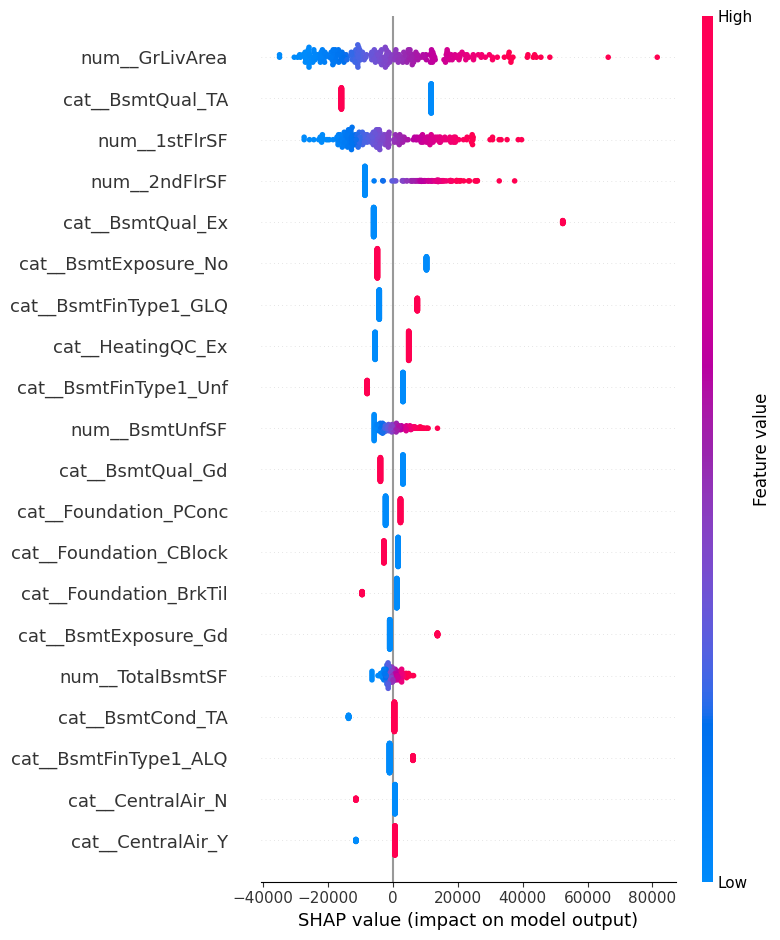

In [110]:
import shap

preprocessor = pipe.named_steps['preprocess']
regression = pipe.named_steps['model']

X_test_preprocessed = preprocessor.transform(X_test)

explainer = shap.Explainer(regression.predict, X_test_preprocessed)

shap_values = explainer(X_test_preprocessed)

shap.summary_plot(
    shap_values.values,
    X_test_preprocessed,
    feature_names=preprocessor.get_feature_names_out()
)

SHAP analysis shows that above-ground living area (GrLivArea) is the strongest predictor of house price by a large margin, followed by 1stFlrSF and 2ndFlrSF. These features directly reflect total usable living space, which strongly drives home value. Basement quality and size also matter, but their effect is secondary. Other categorical features like foundation type or heating quality show smaller contributions. Overall, the model relies most heavily on size-related variables, confirming their central role in price determination.

task 07-nov


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [120]:
X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

categorical_columns = X.select_dtypes(include=["object"]).columns
numeric_columns = X.select_dtypes(exclude=["object"]).columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

In [129]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [132]:
y_pred = pipeline.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.008547008547008548


In [134]:
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10, 15],
    "model__min_samples_split": [2, 5],
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best params: {'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best CV score: 0.022482893450635387
